In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data preprocessing
  
Reading data

In [2]:
measurements = pd.read_excel("BikeData/BikeCounts.xlsx",sheet_name=[8,9,10,11,12,13,14],index_col=0)
measurements = pd.concat([df for df in measurements.values()],axis = 0)
firstDate = measurements.index[0]

In [3]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61343 entries, 2017-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   02-MI-JAN-N 01.04.2015   61337 non-null  float64
 1   02-MI-JAN-S 01.04.2015   61337 non-null  float64
 2   03-MI-SAN-O 01.06.2015   61308 non-null  float64
 3   03-MI-SAN-W 01.06.2015   61329 non-null  float64
 4   05-FK-OBB-O 01.06.2015   48725 non-null  float64
 5   05-FK-OBB-W 01.06.2015   48677 non-null  float64
 6   06-FK-FRA-O 01.06.2016   61329 non-null  float64
 7   06-FK-FRA-W 01.06.2016   61337 non-null  float64
 8   10-PA-BER-N 01.05.2016   61337 non-null  float64
 9   10-PA-BER-S 01.05.2016   61335 non-null  float64
 10  12-PA-SCH 01.03.2012     61338 non-null  float64
 11  13-CW-PRI 01.04.2015     61337 non-null  float64
 12  15-SP-KLO-N 01.06.2016   61322 non-null  float64
 13  15-SP-KLO-S 01.06.2016   61337 non-null  

In [4]:
def nullThresholding(df:pd.DataFrame,threshold:int):
    columnNames = df.columns
    for col in columnNames:
        if df[col].isna().sum()>threshold:
            df.drop([col],inplace = True,axis = 1)

#Deleting the columns with a lot of null values col 28,29, also those measuring point's values are not dislpayed
measurements.index.name = None
nullThresholding(measurements,10000)

#Remove dates after Id to match column names with other table
columnNames = measurements.columns
newNames = [name.split(" ")[0] for name in columnNames]
mapper = {old:new for (old,new) in zip(columnNames,newNames)}
measurements.rename(columns = mapper,inplace=True)

measurements.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61343 entries, 2017-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   02-MI-JAN-N  61337 non-null  float64
 1   02-MI-JAN-S  61337 non-null  float64
 2   03-MI-SAN-O  61308 non-null  float64
 3   03-MI-SAN-W  61329 non-null  float64
 4   06-FK-FRA-O  61329 non-null  float64
 5   06-FK-FRA-W  61337 non-null  float64
 6   10-PA-BER-N  61337 non-null  float64
 7   10-PA-BER-S  61335 non-null  float64
 8   12-PA-SCH    61338 non-null  float64
 9   13-CW-PRI    61337 non-null  float64
 10  15-SP-KLO-N  61322 non-null  float64
 11  15-SP-KLO-S  61337 non-null  float64
 12  17-SZ-BRE-O  61337 non-null  float64
 13  17-SZ-BRE-W  61336 non-null  float64
 14  18-TS-YOR-O  61326 non-null  float64
 15  18-TS-YOR-W  61337 non-null  float64
 16  19-TS-MON    61309 non-null  float64
 17  20-TS-MAR-N  61337 non-null  float64
 18  20-TS-MAR-S

# Data exploration, visualization

Visualize hourly, daily, and seasonal, and yearly average over time, and geographical 
location.  
  
Compare before, and after covid numbers

Geographical locations of the measuring points

In [5]:
import geopandas as gpd

Look at the monthly changes over time, so I can filter the ones with incomplete data

In [6]:
colNames = measurements.columns

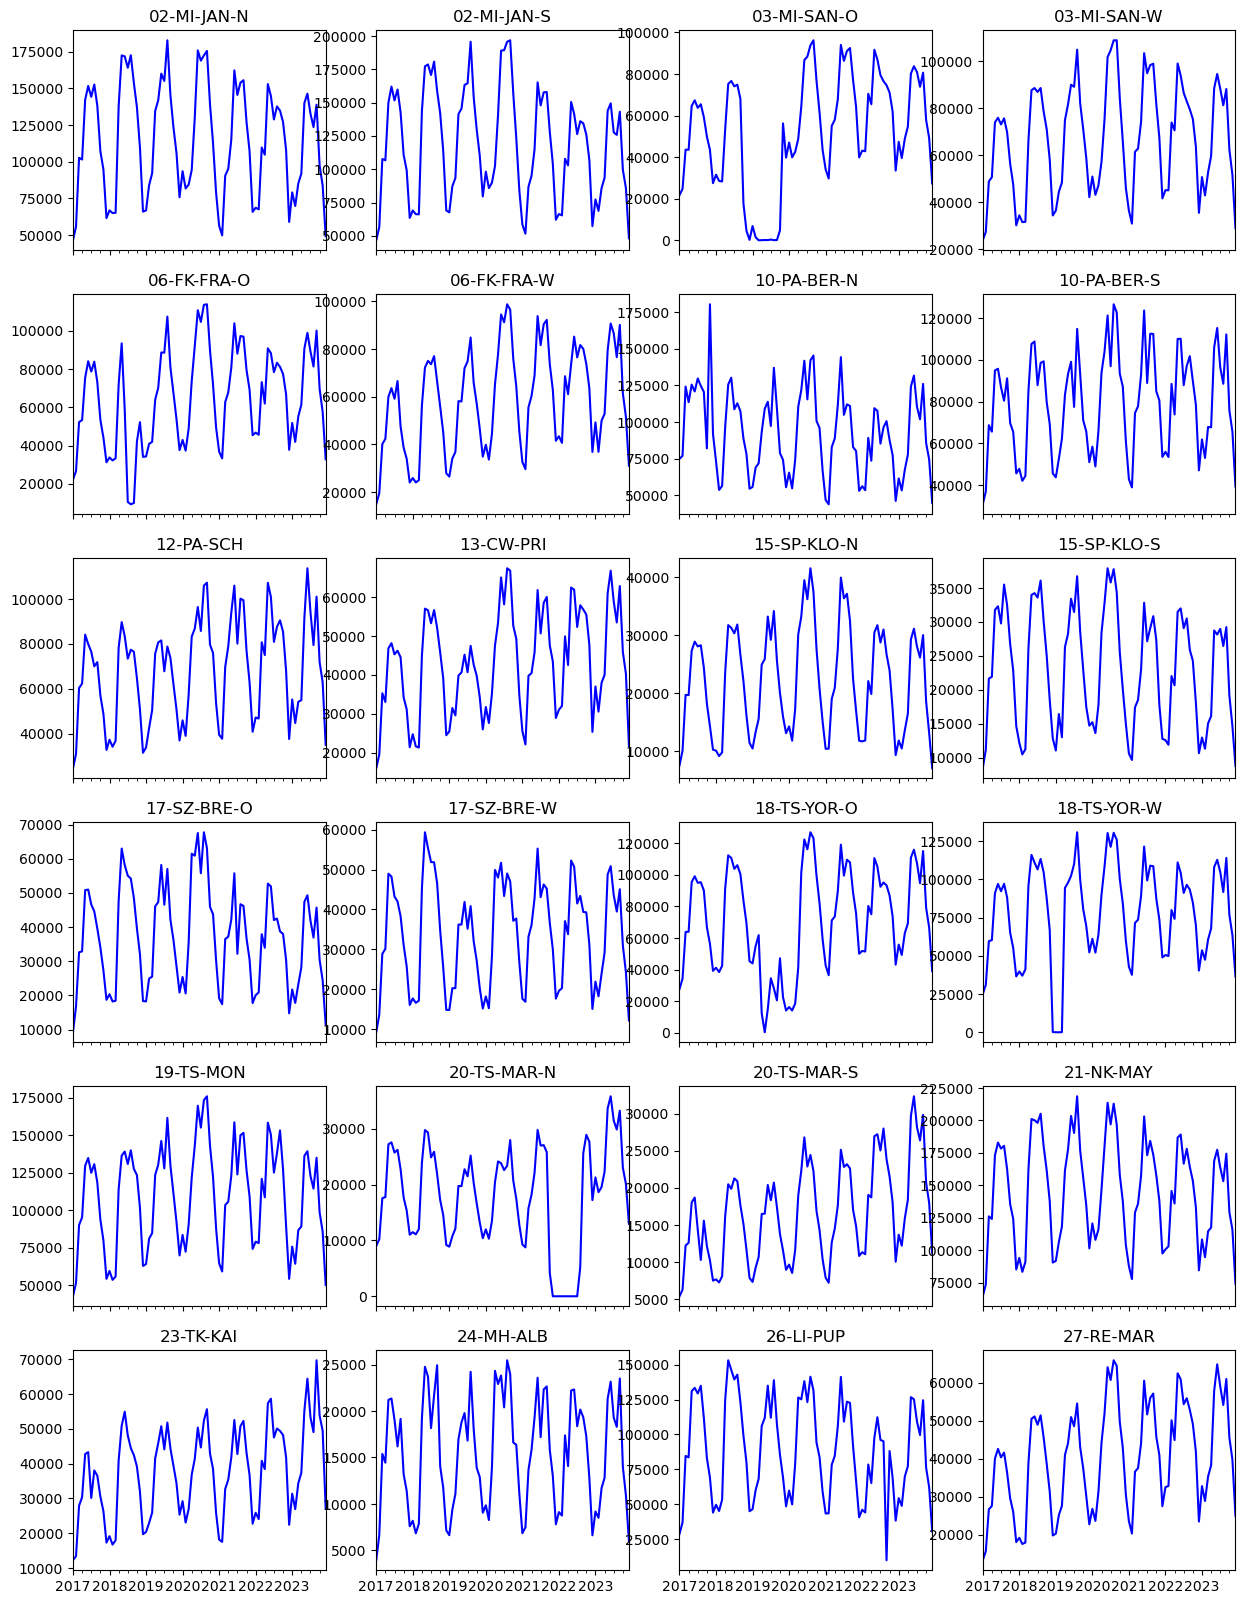

In [7]:
monthlySum = measurements.groupby(pd.PeriodIndex(measurements.index, freq="M")).sum()
axes = monthlySum.plot(subplots = True,figsize = (15,20),layout=(6,4),legend = False, color = "blue")
for c,title in enumerate(monthlySum.columns):
    x = c//axes.shape[1]
    y = c%axes.shape[1]
    axes[x,y].set_title(title)

In [8]:
dailySum = measurements.groupby(pd.PeriodIndex(measurements.index,freq = "D")).sum()

#Averages of a particular time period
meanMonthly=monthlySum.groupby(monthlySum.index.month).mean()
meanHourly=measurements.groupby(measurements.index.hour).mean()
meanDayOfWeek=dailySum.groupby(dailySum.index.dayofweek).mean()

In [9]:
meanDays = measurements.groupby(pd.PeriodIndex(measurements.index,freq="D")).sum()

Average hourly counts every hour of the measurement points since their installation

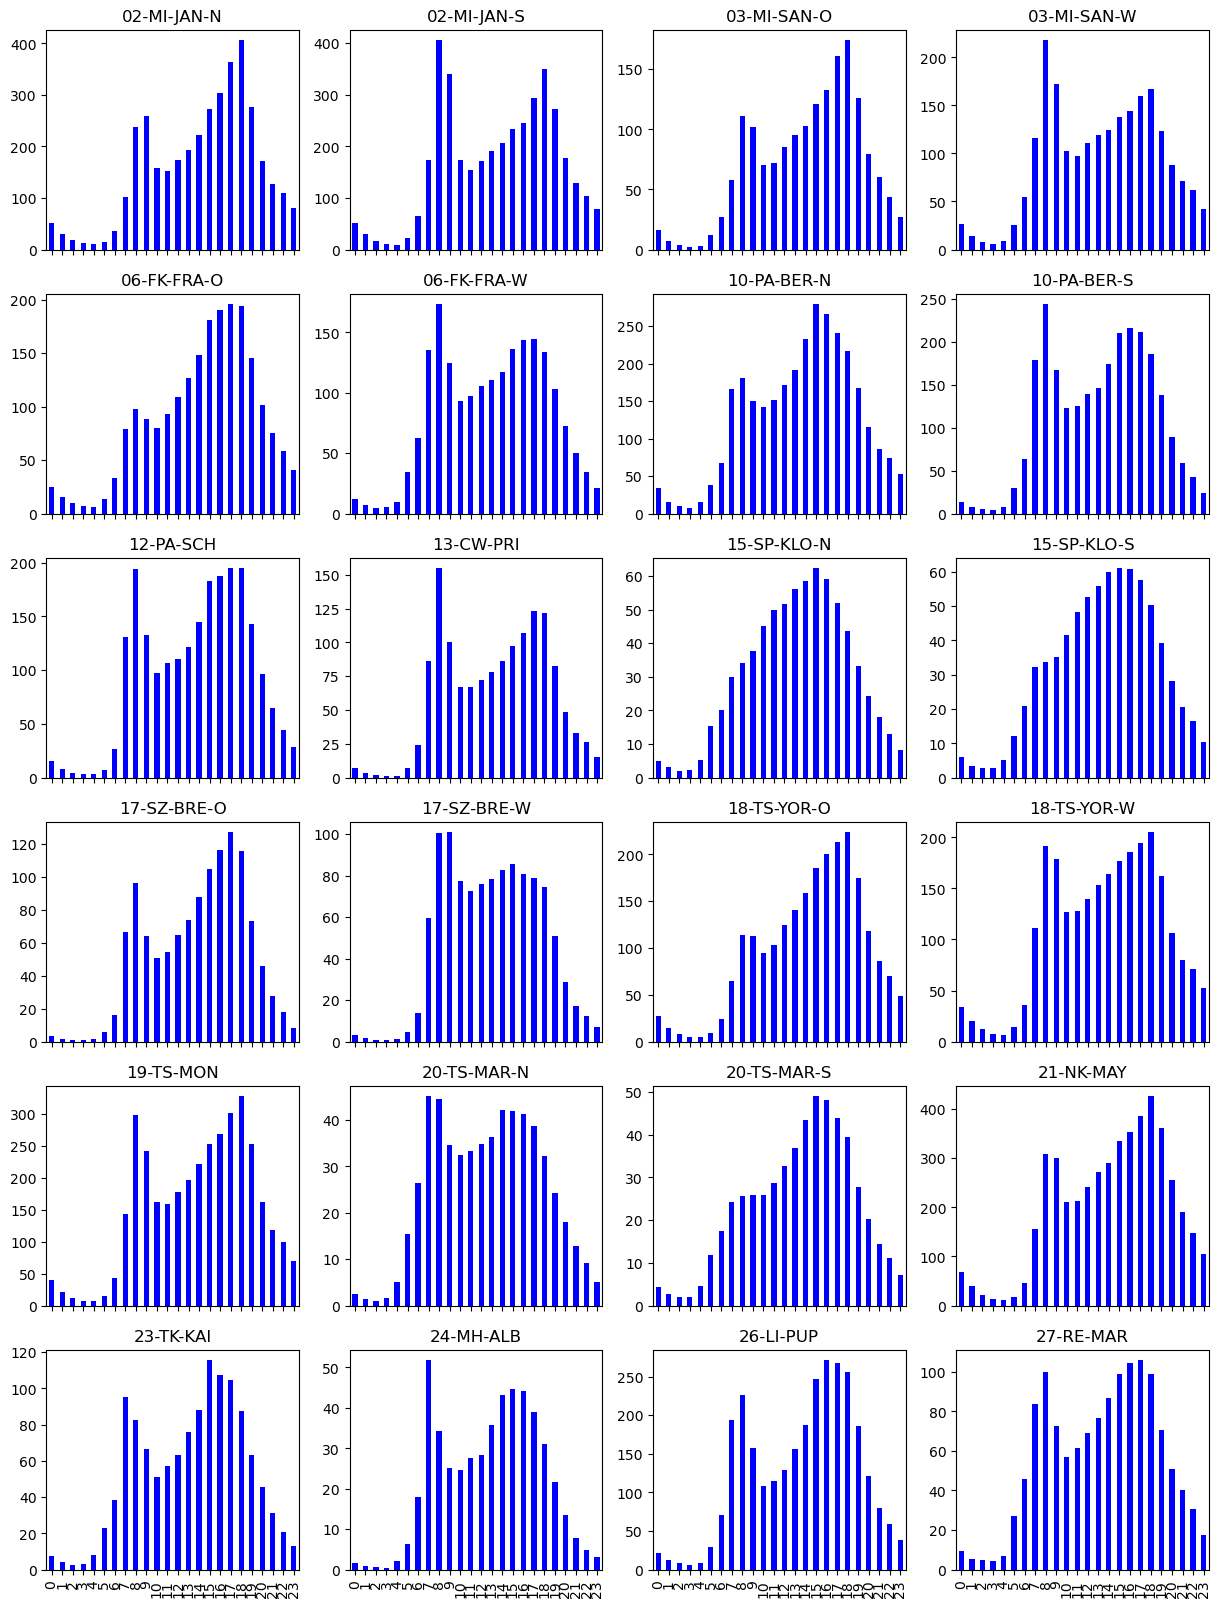

In [10]:
axes = meanHourly.plot(kind = "bar",subplots = True,figsize = (15,20),layout=(6,4),legend = False,color = "blue")

Average counts of each month of each measuring points since their installation

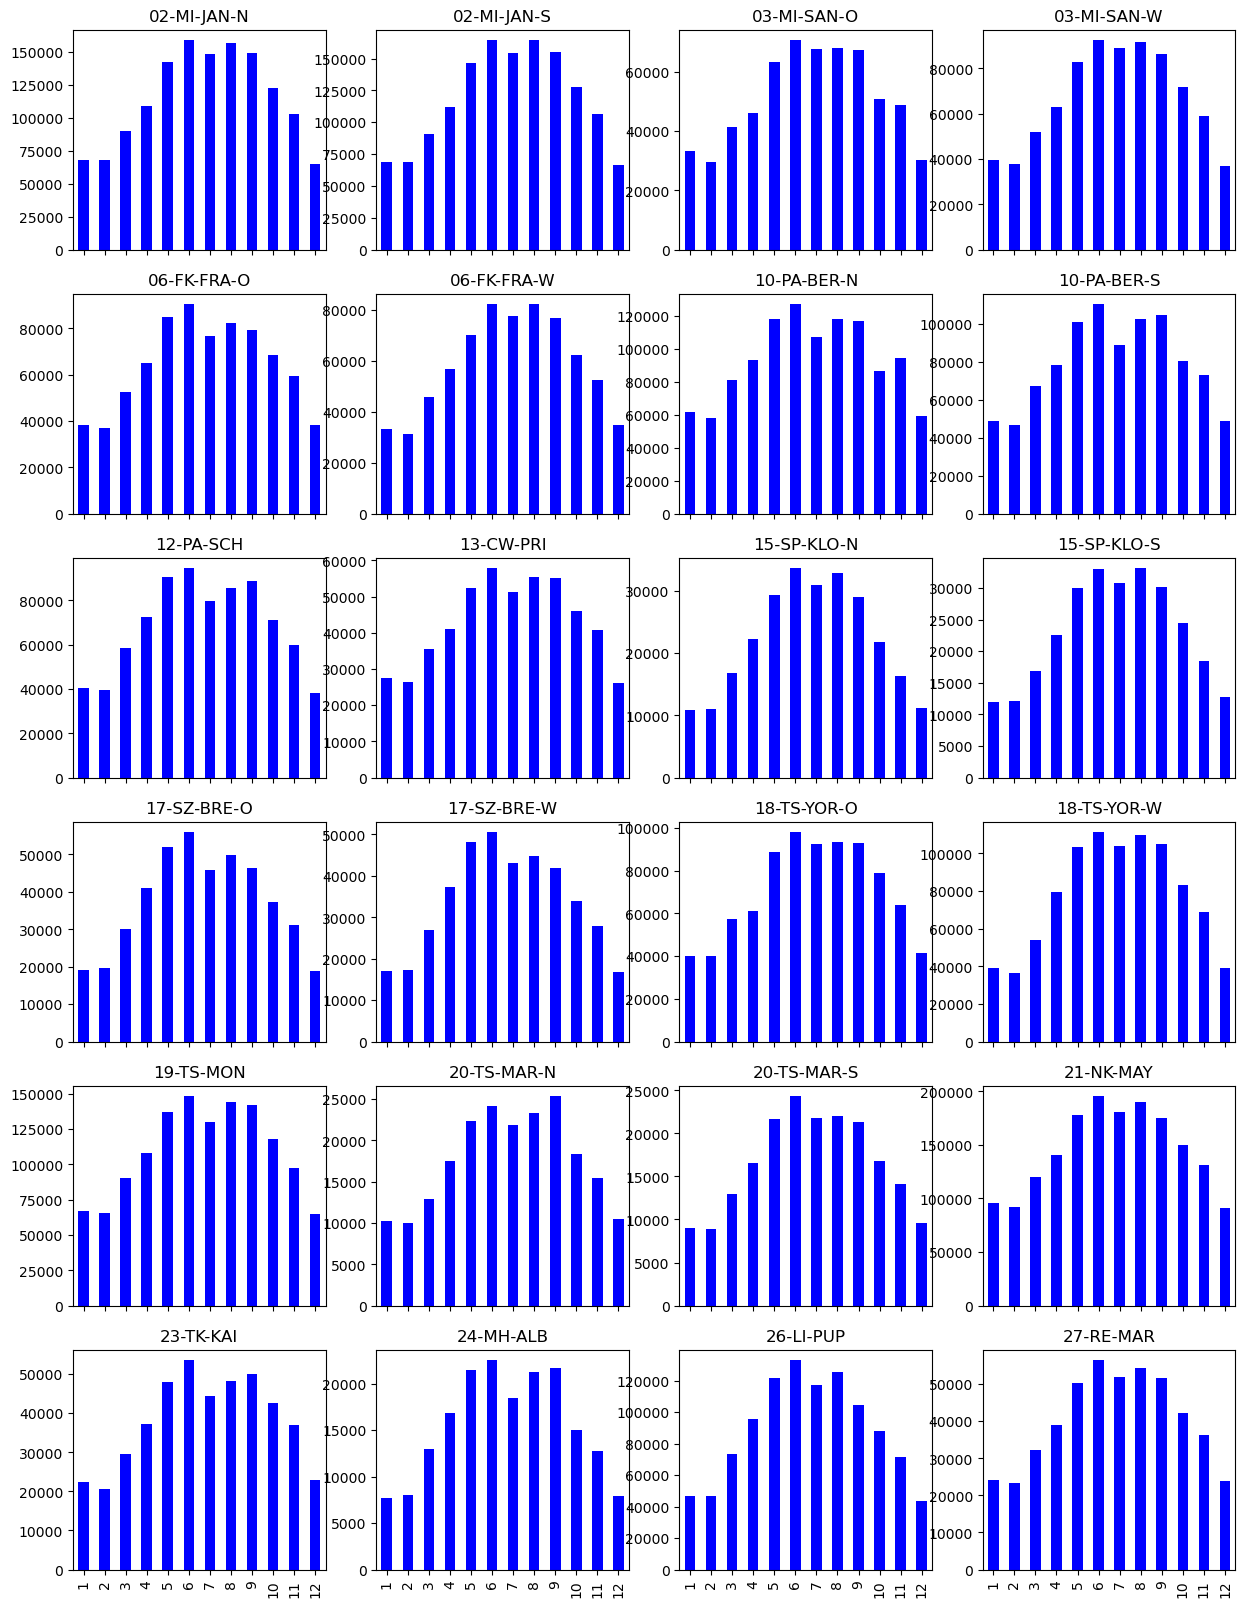

In [11]:
axes = meanMonthly.plot(kind = "bar",subplots = True,figsize = (15,20),layout=(6,4),legend = False,color = "blue")

Average counts on the days of the week of each measuring points since their installation

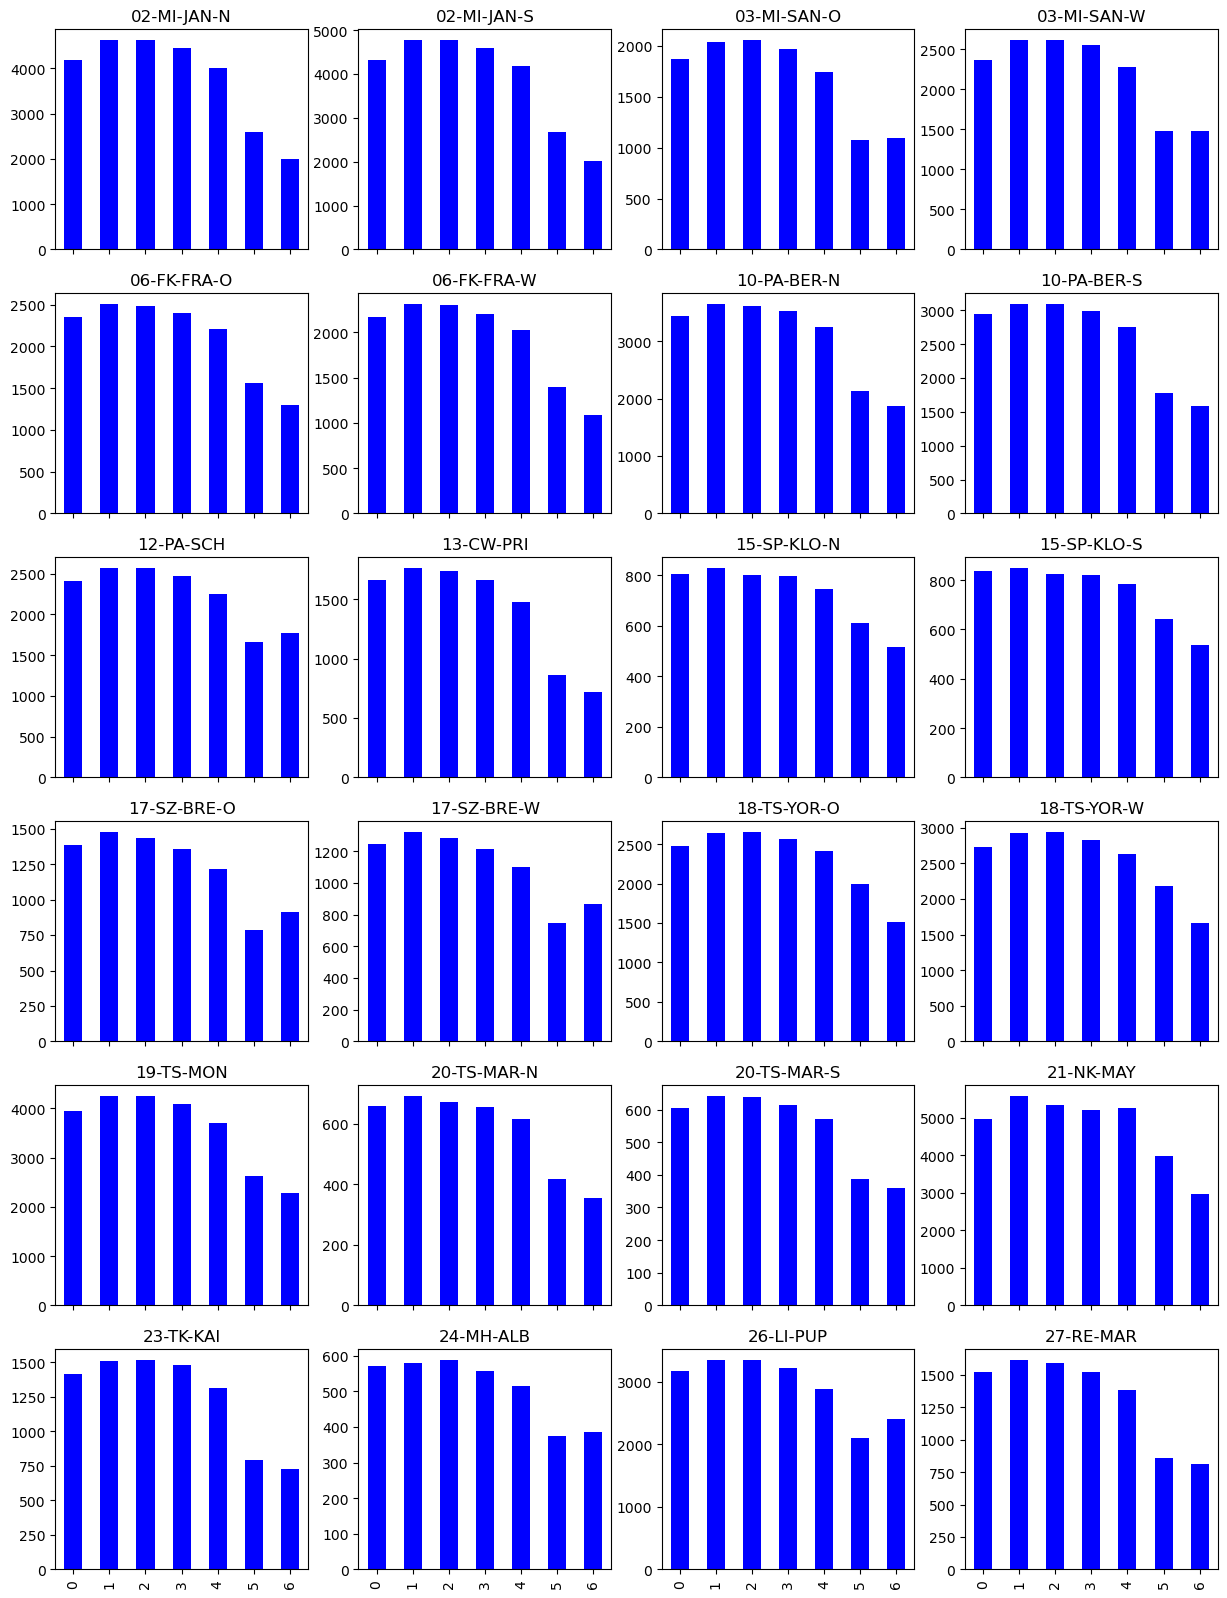

In [12]:
axes =meanDayOfWeek.plot(kind = "bar",subplots = True,figsize = (15,20),layout=(6,4),legend = False,color = "blue")

Locations of the measurment points

In [13]:
#Plot geo data
#Reading geo data
berlin_data = gpd.read_file("GeographicalData/Berlin.geojson")
berlin_roads = gpd.read_file("GeographicalData/BerlinRoadNetwork.geojson")
berlin_main_roads = berlin_roads[(berlin_roads["strassenkl"] == "II") | (berlin_roads["strassenkl"]=="I")]

#Add weekly average to measure points
measureStationLocations = pd.read_excel("BikeData/BikeCounts.xlsx",sheet_name=[2])[2]

#Tanslate column names
measureStationLocations.rename(columns={"Zählstelle": "Measure station","Beschreibung - Fahrtrichtung":"Direction of travel","Breitengrad":"Latitude","Längengrad":"Longtitude","Installationsdatum":"Installation date"},inplace= True)
measureStationLocations.replace({'17-SK-BRE-O':'17-SZ-BRE-O', '17-SK-BRE-W':'17-SZ-BRE-W'},inplace=True)
measureStationLocations = measureStationLocations[measureStationLocations["Measure station"].isin(measurements.columns)].reset_index()

weeklySum = measurements.groupby(pd.PeriodIndex(measurements.index,freq = "Y")).sum()
yearlyMean = weeklySum.mean()
measureStationLocations.insert(1,"Yearly average",yearlyMean.values)

c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


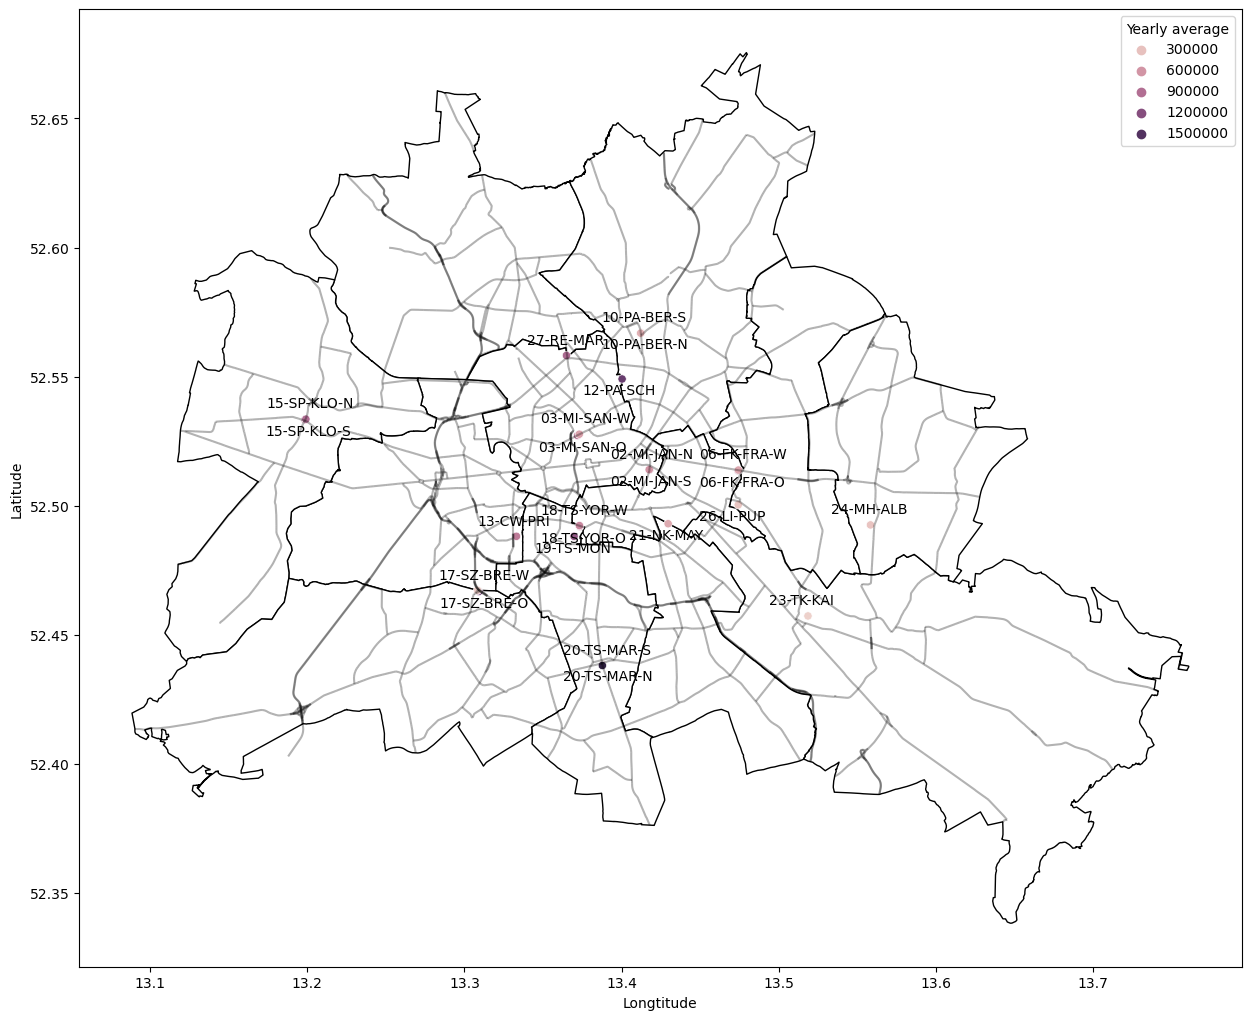

In [14]:
fig,axs = plt.subplots(figsize=(15,20))

berlin_data.plot(ax = axs,color = "white", edgecolor = "black")
berlin_main_roads.plot(ax = axs,color = "black",alpha = 0.3)
sns.scatterplot(ax = axs,data=measureStationLocations, x="Longtitude", y="Latitude", hue = "Yearly average",alpha = 1)

for i, txt in enumerate(measureStationLocations["Measure station"]):
    x,y = measureStationLocations["Longtitude"][i], measureStationLocations["Latitude"][i]
    if i%2 == 0:
        axs.annotate(txt, (x,y),xytext= (x-0.025,y-0.006))
    else:
        axs.annotate(txt, (x,y),xytext= (x-0.025,y+0.0045))


### The most south point is the one leading to the airport

# Data patterns
From the above plots, we can conclude that all of the average data are following the same trend. This means that it is enough to use only one of the measurement points's data. Alternatively we can sum them up, assuming that a biker did not cross 2 different measuring point, which is a right assumption given the geographical spread of the checkpoints.  

The patterns are appearing hourly, weekly, and yearly. I am going to examine the data with respect to the daily weather, so I want to eliminate the 
weekly deviations from the data, because that would influence the training. It can be easily done, just by separating the weekdays, and the weekends.
  
It can also be seen from the plots, that the number of daily bikers depend heavily on the season, so the data will be split based on seasons or months, and will be examined separately.  

#### 1. Look at the deviations of the different time periods. Compare the whole, weekdays, and weekends data.
  
Some of the years contain a lot of values that are not real, and not plausible. For accurate data description, I decided to take a look at the year 2020.

In [15]:
#Splitting to weekends and weekdays
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output = False)

y2020 = dailySum[dailySum.index.year==2020]
#Convert days to weekdays and weekends
values = y2020.index.dayofweek.values
mapper = {0:"Weekday",1:"Weekday",2:"Weekday",3:"Weekday",4:"Weekday",5:"Weekend",6:"Weekend"}
weekdays = np.array([mapper[k] for k in values])

#Find weekends and weekdays based on date index
enc.fit(weekdays.reshape((-1,1)))
out = enc.transform(weekdays.reshape((-1,1)))
onehotDays = pd.DataFrame(out,index = y2020.index)
weekendsCounts = pd.concat([y2020,onehotDays],axis = 1)
days = ["Weekday","Weekend"]
weekendsCounts.rename(columns = {k:v for (k,v) in zip(range(2),days)},inplace = True)

#Split the data
weekdays = weekendsCounts[weekendsCounts["Weekday"] == 1]
weekends = weekendsCounts[weekendsCounts["Weekend"] == 1]
weekdays = weekdays[weekdays.columns[:len(weekdays.columns)-2]]
weekends = weekends[weekends.columns[:len(weekends.columns)-2]]

<Axes: >

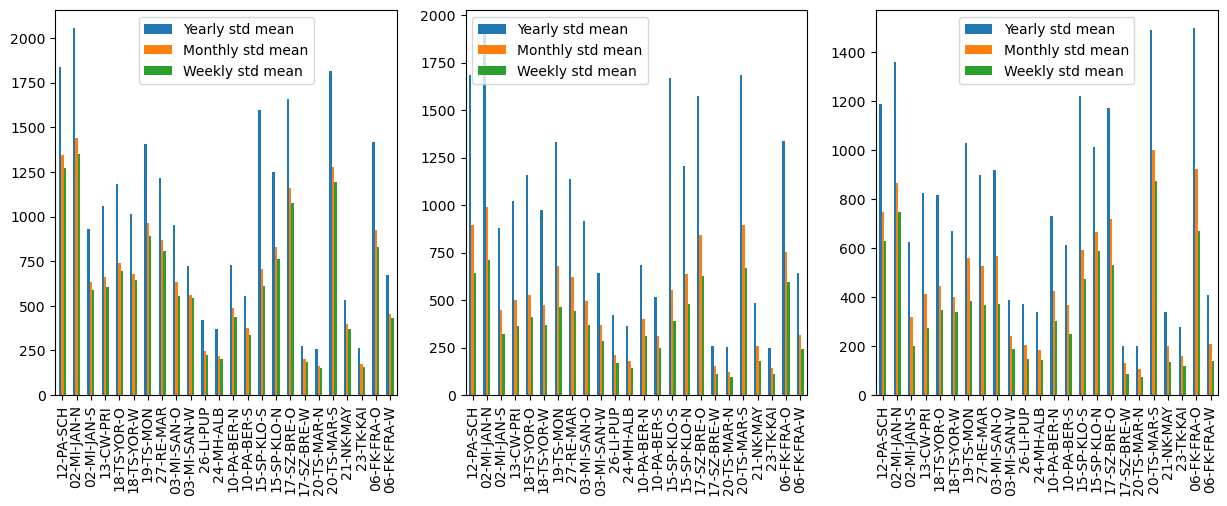

In [16]:
def getMeanStds(data):
    meanStdYearly = data.groupby(data.index.year).std().mean()
    meanStdMonthly = data.groupby(pd.PeriodIndex(data.index,freq = "M")).std().mean()
    meanStdWeekly = data.groupby(pd.PeriodIndex(data.index,freq = "W")).std().mean()

    meanStds = pd.DataFrame({"Yearly std mean": meanStdYearly.values, "Monthly std mean": meanStdMonthly.values,"Weekly std mean":meanStdWeekly.values},index = measureStationLocations["Measure station"].values)
    return meanStds
fig, axs = plt.subplots(1,3,figsize = (15,5))

meansWhole = getMeanStds(y2020)
meansWeekdays = getMeanStds(weekdays)
meansWeekends = getMeanStds(weekends)

meansWhole.plot.bar(ax = axs[0])
meansWeekdays.plot.bar(ax = axs[1])
meansWeekends.plot.bar(ax = axs[2])

As it can be seen from the above plot, the monthly and weekly mean standard deviations are substantially lower compared to the yearly deviations. I am going to use monthly period to find outliers, because the weekly would be too fine grained. Using a lower standard deviation data helps to identify outliers much better over a yearly period, because if the std is large, it means that the quantiles are also more spread out. For example the details like a rainy summer day would be left out, because of the values obtained during winter. 
  
I will take a look at the weekdays, and the weekends separately, because that is another reason for deviations from the actual trends.  
  
The high standard deviation values can happen, bacause the machines can fail, and the data contains multiple measurements that are marked as not accurate. Unfortunately these are replaced with 0. The problem with this, is that they cannot be distinguished from other measurements where the number was actually 0, and the values cannot be replaced by Nans. 

#### 2. Find outlier days of each month by looking at the quntiles.

I decided to further examine 2 of the measuring points based on the above measurements.  
- 02-MI-JAN: This is located quite close to the city centre, where events might take place, with traffic restrictions. Also its weekly average is one of the lowest, however it has one of the highest average standard deviations.
- 20-TS-MAR: This chackpoint is located on a road which leads to the airport. Also we need to mention that to one direction it has a large mean standard deviation, but much lower to the other direction.  
  
Again as mentioned above, I will look at the weekends, and weekdays for outliers.  

In [17]:
"""
Takes a datafrme, and a groupby method, which means what period the outliers should be found for.

Returns a dict, that where each entry is a 2D list of outliers for each month
"""
def findOutliers(df:pd.DataFrame, groupbyMethod)->dict:
    outliers = {k:None for k in df.columns}
    grouped = df.groupby(groupbyMethod)
    Q1 = grouped.quantile(0.25)
    Q3 = grouped.quantile(0.75)
    iqr = Q3-Q1
    lowerBound = Q1 - 1.5*iqr
    upperBound = Q3 + 1.5*iqr
    lowerBound = lowerBound.resample("1d").ffill()
    upperBound = upperBound.resample("1d").ffill()
    lowerBound = lowerBound[lowerBound.index.isin(df.index.values)]
    upperBound = upperBound[upperBound.index.isin(df.index.values)]

    for col in df.columns:
        outliers[col] = df[col][(df[col] < lowerBound[col]) | (df[col]>upperBound[col])]
    return outliers

usedStations = ["02-MI-JAN-N", "02-MI-JAN-S","20-TS-MAR-N","20-TS-MAR-S"]
weekendsReduced = weekends[usedStations]
weekdaysReduced = weekdays[usedStations]

outliersWeekdays = findOutliers(weekdaysReduced,pd.PeriodIndex(weekdaysReduced.index,freq = "M"))
outliersWeekends = findOutliers(weekendsReduced,pd.PeriodIndex(weekendsReduced.index,freq = "M"))

#print(outliersWeekdays)

C:\Users\hgand\AppData\Local\Temp\ipykernel_16524\1424828443.py:14: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  lowerBound = lowerBound.resample("1d").ffill()
C:\Users\hgand\AppData\Local\Temp\ipykernel_16524\1424828443.py:15: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  upperBound = upperBound.resample("1d").ffill()


In [18]:
def plotOutliers(data:pd.DataFrame,outliers:dict):
    fig,axs = plt.subplots(2,2,figsize = (12,7))
    for c,col in enumerate(data.columns):
        sns.scatterplot(data= data,x = data.index.to_timestamp(),y = col, ax = axs[c%2,c//2] )
        sns.scatterplot(outliers[col],ax = axs[c%2,c//2])


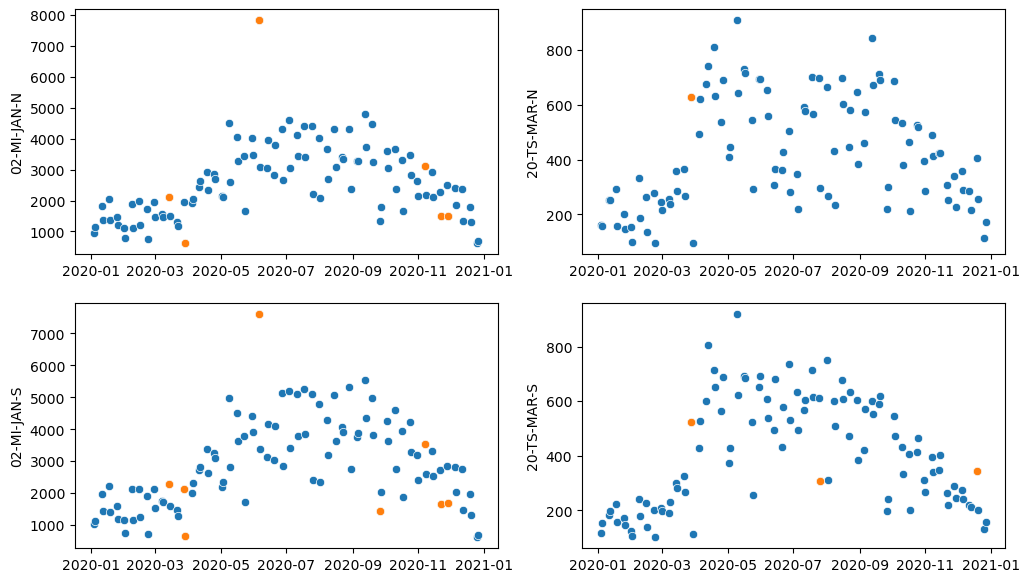

In [19]:
plotOutliers(weekendsReduced,outliersWeekends)

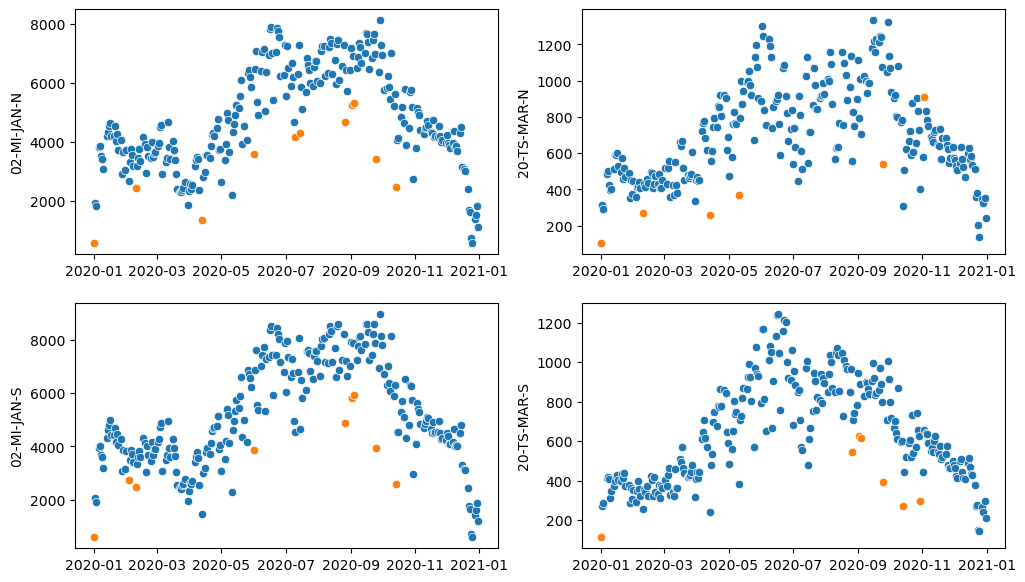

In [20]:
plotOutliers(weekdaysReduced,outliersWeekdays)

These are the outliers, however not looking at the whole year, but each month. Now lets see if anything actually happened on these days.

In [44]:
"""
Return unique outliers
"""
def getOutlierValues(outlierDict):
    outliers = np.array([])
    for val in outlierDict.values():
        outliers = np.append(outliers, val.index.format())
    return np.unique(outliers)

outlWeekdays = getOutlierValues(outliersWeekdays)
outlWeekends = getOutlierValues(outliersWeekends)

print(outlWeekdays)
print(outlWeekends)

['2020-01-01' '2020-02-03' '2020-02-10' '2020-04-13' '2020-05-11'
 '2020-06-01' '2020-07-10' '2020-07-15' '2020-08-26' '2020-09-02'
 '2020-09-04' '2020-09-25' '2020-10-14' '2020-10-30' '2020-11-03']
['2020-03-14' '2020-03-28' '2020-03-29' '2020-06-06' '2020-07-26'
 '2020-09-26' '2020-11-07' '2020-11-22' '2020-11-29' '2020-12-19']


C:\Users\hgand\AppData\Local\Temp\ipykernel_16524\2873369321.py:7: FutureWarning: PeriodIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  outliers = np.append(outliers, val.index.format())


Look at what happened at each of the dates where I could find some explanation:
- 2020-01-01: New year
- 2020-02: Start of the COVID lockdowns
- 2020-06-06: BLM protest
  
Others might be individual fluctuations from the measurement stations.

3. Looking at the weather data, try to find out what happened at the days of the outliers

In [45]:
def readWeatherData(path,colNames,index_col):
    df = pd.read_csv(path,delimiter="\s+|;\s*",parse_dates=True,date_format="%Y%m%d%H",usecols= colNames,index_col=index_col)
    df.index.name=None
    df = df.groupby(df.index).last() #Skipping duplicates
    return df

In [46]:
rainData = readWeatherData("Weather/berlin_precipitation.csv",["MESS_DATUM","R1","RS_IND"],"MESS_DATUM")
windData = readWeatherData("Weather/berlin_wind.csv",["MESS_DATUM","F","D"],"MESS_DATUM")
temperatureData = readWeatherData("Weather/berlin_temperature.csv",["MESS_DATUM","TT_TU","RF_TU"],"MESS_DATUM")
sunData = readWeatherData("Weather/berlin_sun.csv",["MESS_DATUM","SD_SO"],"MESS_DATUM")

rainData = rainData[(rainData.index >= "2020-01-01") & (rainData.index < "2021-01-01")]
windData = windData[(windData.index >= "2020-01-01") & (windData.index < "2021-01-01")]
temperatureData = temperatureData[(temperatureData.index >= "2020-01-01") & (temperatureData.index < "2021-01-01")]
sunData = sunData[(sunData.index >= "2020-01-01") & (sunData.index < "2021-01-01")]

#Create a wether dataframe with the relevant values
#weatherData = pd.concat([temperatureData["TT_TU"],temperatureData["RF_TU"],windData["F"],windData["D"],rainData["R1"],rainData["RS_IND"]]
#                        ,axis = 1
#                        ,keys=["Temperature","Humidity","Wind_speed", "Wind_direction","Precipitation","Precipitation_indicator"])

weatherData = pd.concat([temperatureData,rainData,windData,sunData],axis = 1)
weatherData = weatherData.rename(columns = {"R1":"Precipitation","RS_IND":"Precipitation_indicator","F":"Wind_speed","D":"Wind_direction",
                    "TT_TU":"Temperature","RF_TU":"Humidity","SD_SO":"Hourly sunshine"})
#Handling missing values
weatherData.replace(-999,np.NaN,inplace=True)
weatherData["Hourly sunshine"] = weatherData["Hourly sunshine"].fillna(0)

weatherData.tail()

C:\Users\hgand\AppData\Local\Temp\ipykernel_16524\4133407124.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="\s+|;\s*",parse_dates=True,date_format="%Y%m%d%H",usecols= colNames,index_col=index_col)
C:\Users\hgand\AppData\Local\Temp\ipykernel_16524\4133407124.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="\s+|;\s*",parse_dates=True,date_format="%Y%m%d%H",usecols= colNames,index_col=index_col)
C:\Users\hgand\AppData\Local\Temp\ipykernel_16524\4133407124.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine

,Temperature,Humidity,Precipitation,Precipitation_indicator,Wind_speed,Wind_direction,Hourly sunshine
2020-12-31 19:00:00,2.6,75.0,0.0,0,3.1,150.0,0.0
2020-12-31 20:00:00,2.3,76.0,0.0,0,2.8,160.0,0.0
2020-12-31 21:00:00,2.1,78.0,0.0,0,2.2,160.0,0.0
2020-12-31 22:00:00,2.1,80.0,0.0,1,2.0,160.0,0.0
2020-12-31 23:00:00,2.3,81.0,0.0,1,1.5,170.0,0.0


In [64]:
measurementsReduced = measurements[usedStations]
measurementsReduced2020 = measurementsReduced[(measurementsReduced.index >= "2020-01-01")&(measurementsReduced.index<"2021-01-01")]
sumOfCounts = measurementsReduced2020[measurementsReduced2020.columns[:4]].mean(axis = 1)
measurementsReduced2020.insert(4,"Summed counts",sumOfCounts)

measurementsWeather = pd.concat([measurementsReduced2020,weatherData],axis = 1)

#In order to get more accurate results, I group the data by days, and calculate the appropriate values for each column
meanCols = ["Temperature","Humidity","Wind_speed"]
maxCols = ["Precipitation_indicator"]
sumCols = ["02-MI-JAN-N","02-MI-JAN-S","20-TS-MAR-N","20-TS-MAR-S","Precipitation","Hourly sunshine"]

mMean = measurementsWeather[meanCols]
mMax = measurementsWeather[maxCols]
mSum = measurementsWeather[sumCols]

mMean = mMean.groupby(pd.PeriodIndex(mMean.index,freq = "D")).mean()
mMax = mMax.groupby(pd.PeriodIndex(mMax.index,freq = "D")).max()
mSum = mSum.groupby(pd.PeriodIndex(mSum.index,freq = "D")).sum()


countsWeatherDaily = pd.concat([mSum,mMean],axis = 1)

weatherWeekends = countsWeatherDaily[countsWeatherDaily.index.isin(weekends.index)]
weatherWeekdays = countsWeatherDaily[countsWeatherDaily.index.isin(weekdays.index)]
weatherWeekdays.head()

,02-MI-JAN-N,02-MI-JAN-S,20-TS-MAR-N,20-TS-MAR-S,Precipitation,Hourly sunshine,Temperature,Humidity,Wind_speed
2020-01-01,579.0,603.0,103.0,114.0,0.0,92.0,2.733333,87.750000,2.512500
2020-01-02,1948.0,2088.0,313.0,274.0,0.0,374.0,0.875000,76.291667,1.712500
2020-01-03,1827.0,1903.0,291.0,286.0,4.3,0.0,4.641667,88.375000,4.237500
2020-01-06,3825.0,3931.0,487.0,411.0,0.0,94.0,4.904167,80.333333,2.875000
2020-01-07,3850.0,4021.0,500.0,421.0,0.4,0.0,2.716667,91.708333,2.283333


<Axes: >

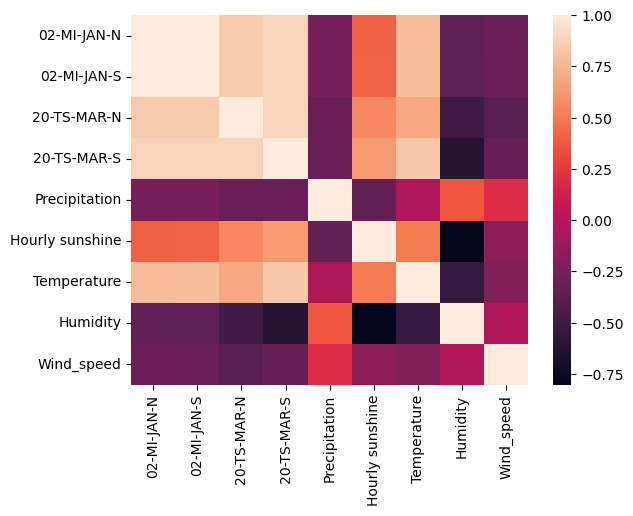

In [65]:
#Correlation matrix
corrMatrix = weatherWeekdays.corr()
sns.heatmap(corrMatrix)

Hourly sunshine and temperature correlates positively with the data, while precipitation, humidity, and wind speed correlate negatively. 

4. Do a grouping on the overall data, and try to understand the groups

c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmea

,Precipitation,Hourly sunshine,Temperature,Humidity,Wind_speed
2020-01-01,0.0,92.0,2.733333,87.750000,2.512500
2020-01-02,0.0,374.0,0.875000,76.291667,1.712500
2020-01-03,4.3,0.0,4.641667,88.375000,4.237500
2020-01-06,0.0,94.0,4.904167,80.333333,2.875000
2020-01-07,0.4,0.0,2.716667,91.708333,2.283333


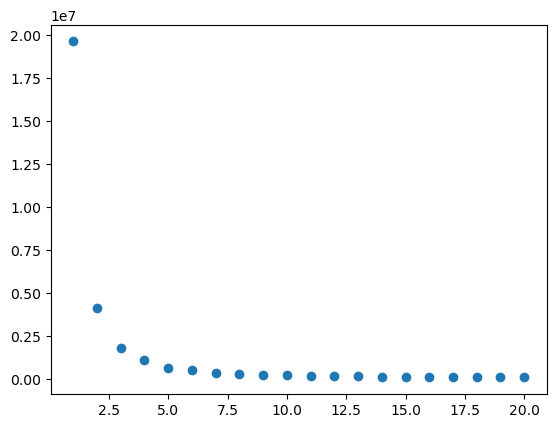

In [71]:
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

#Preprocessing of the data for clustering. First the Nan values are removed, second, since the counts are going to be described, 
#we cant keep all 4 measure station's counts in the table, so I am summing them.(With this I am assuming that no cyclists cross the same point 
# twice)
#imputer = KNNImputer(n_neighbors = 4, weights = "uniform")
#measurementsWeatherRaw = imputer.fit_transform(countsWeatherDaily)
#sumData = measurementsWeatherRaw[:,4:]

train = weatherWeekdays[weatherWeekdays.columns[4:]]

#Determine the best number of clusters
def fit(data,numCentroids):
    km = KMeans(n_clusters= numCentroids)
    km.fit(data)
    return km.inertia_

centroidsErrors = []
maxCentroids = 20
for C in range(1,maxCentroids+1):
    centroidsErrors.append(fit(train,C))

plt.scatter(np.arange(1,maxCentroids+1),centroidsErrors)
train.head()

I would use around 4 clusters, as more inertia is less mostly because there are more centroids, which will obviously reduce the distance. Next I will find the most important features, and visualize the clusters based on them.


c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[159 103]


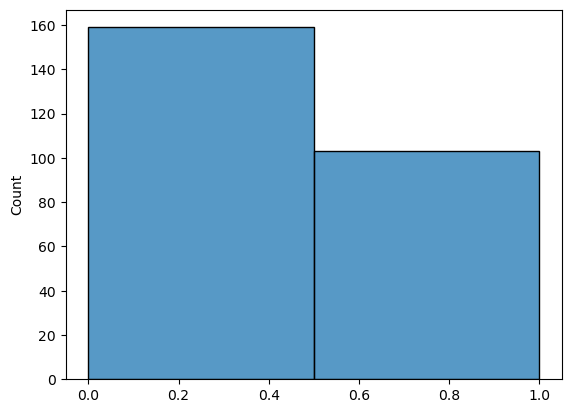

In [72]:
numClusters = 2
km = KMeans(n_clusters= numClusters)
km.fit(weatherWeekdays)
#Find the size of each group
groups,counts = np.unique(km.labels_,return_counts = True)
sns.histplot(km.labels_,bins = numClusters)
print(counts)

<Axes: xlabel='PC1', ylabel='PC2'>

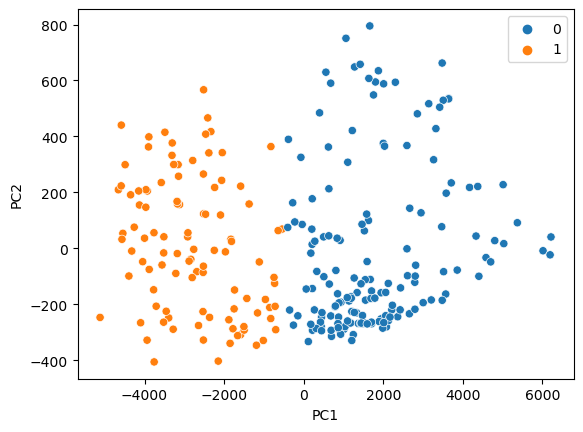

In [73]:
#Visualizing the clusters using PCA. I am keeping 4 dimensions, because 1., 3 features had a high correlation with the number of 
#cyclists (temperature,humidity, and sunshine), and it is still quite easy to visualize separately.
from sklearn.decomposition import PCA

pca = PCA(2)
transformed_data = pca.fit_transform(weatherWeekdays)

pca_data = pd.DataFrame(transformed_data,columns=['PC1','PC2']) 
label = pd.Categorical(km.labels_)
sns.scatterplot(x="PC1",y="PC2",hue=label,data=pca_data)

The clusters are tightly placed around each other, and no outlier is found. My guess based on this, is that the clusters are based on the seasons of the year, as the weather changes tho most according to them. So next I will visualize the entries of the table by time, temperature, humidity, and average hourly sunshine per day, and marking the cluster it belongs to with a color.

In [74]:
def plotPredictions(data,label,columns):
    fig, axs = plt.subplots(2,2,figsize = (15,10))

    sns.scatterplot(s = 20,ax = axs[0,0],data = data, x = data.index.to_timestamp(), y = columns[0],hue =  label)
    sns.scatterplot(s = 20,ax = axs[0,1],data = data, x = data.index.to_timestamp(), y = columns[1],hue =  label)
    sns.scatterplot(s = 20,ax = axs[1,0],data = data, x = data.index.to_timestamp(), y = columns[2],hue =  label)
    sns.scatterplot(s = 20,ax = axs[1,1],data = data, x = data.index.to_timestamp(), y = columns[3],hue =  label)

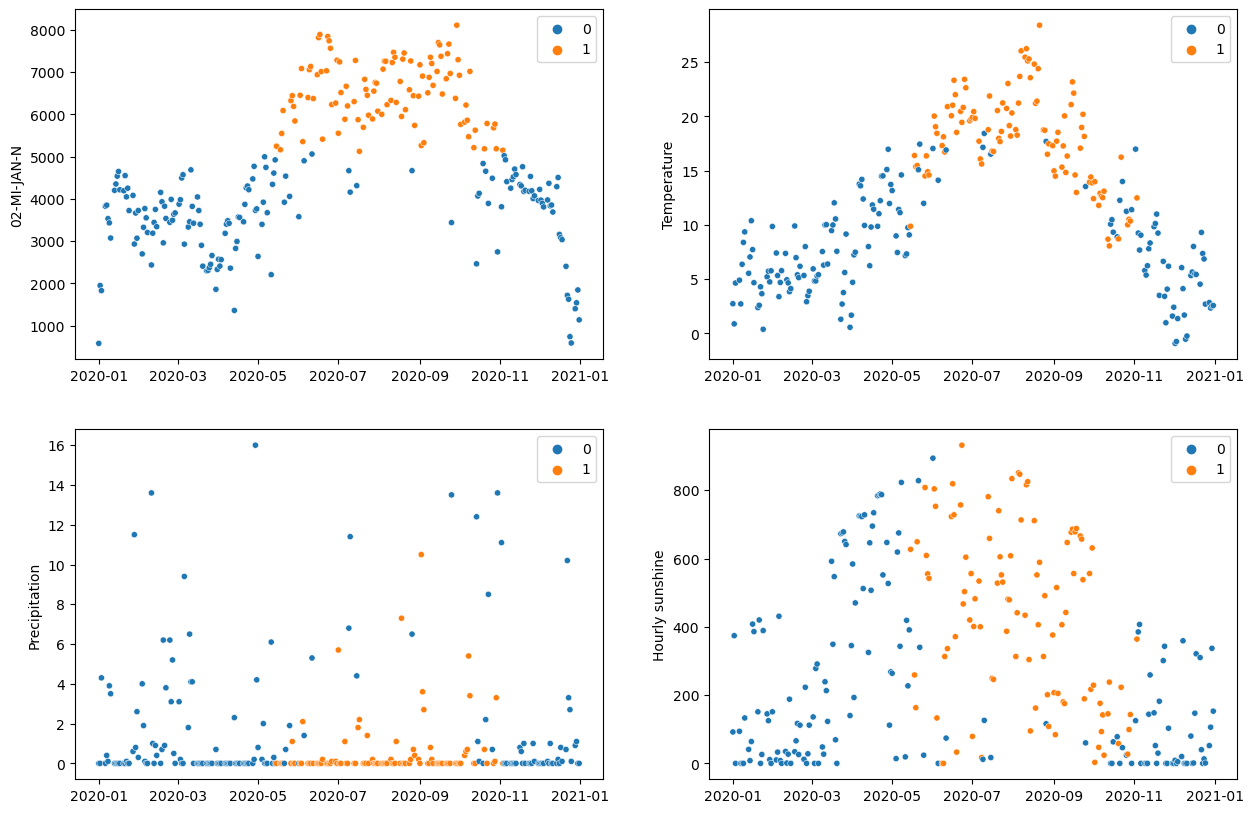

In [76]:
weatherLabels = ["02-MI-JAN-N","Temperature","Precipitation","Hourly sunshine"]
plotPredictions(weatherWeekdays,label,weatherLabels)

This classification does not seem to be correct. The reason for that, is the data has multiple underlying patterns, like a day, a week, and a month. So for better results, I will group the data daily, and calculate the average, then do the clustering.

In [77]:
#Try on normalized data, but dont norm categorical
a = train[train.columns[:5]]
a = (a-a.mean())/a.std()
b = train[train.columns[5:]]
dfNormed = pd.concat([a,b],axis = 1)
dfNormed.head()

,Precipitation,Hourly sunshine,Temperature,Humidity,Wind_speed
2020-01-01,-0.442046,-0.767673,-1.343023,1.170808,-0.844781
2020-01-02,-0.442046,0.262566,-1.620942,0.396367,-1.521688
2020-01-03,1.097870,-1.103779,-1.057626,1.213050,0.614798
2020-01-06,-0.442046,-0.760366,-1.018368,0.669534,-0.538058
2020-01-07,-0.298798,-1.103779,-1.345515,1.438342,-1.038687


c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


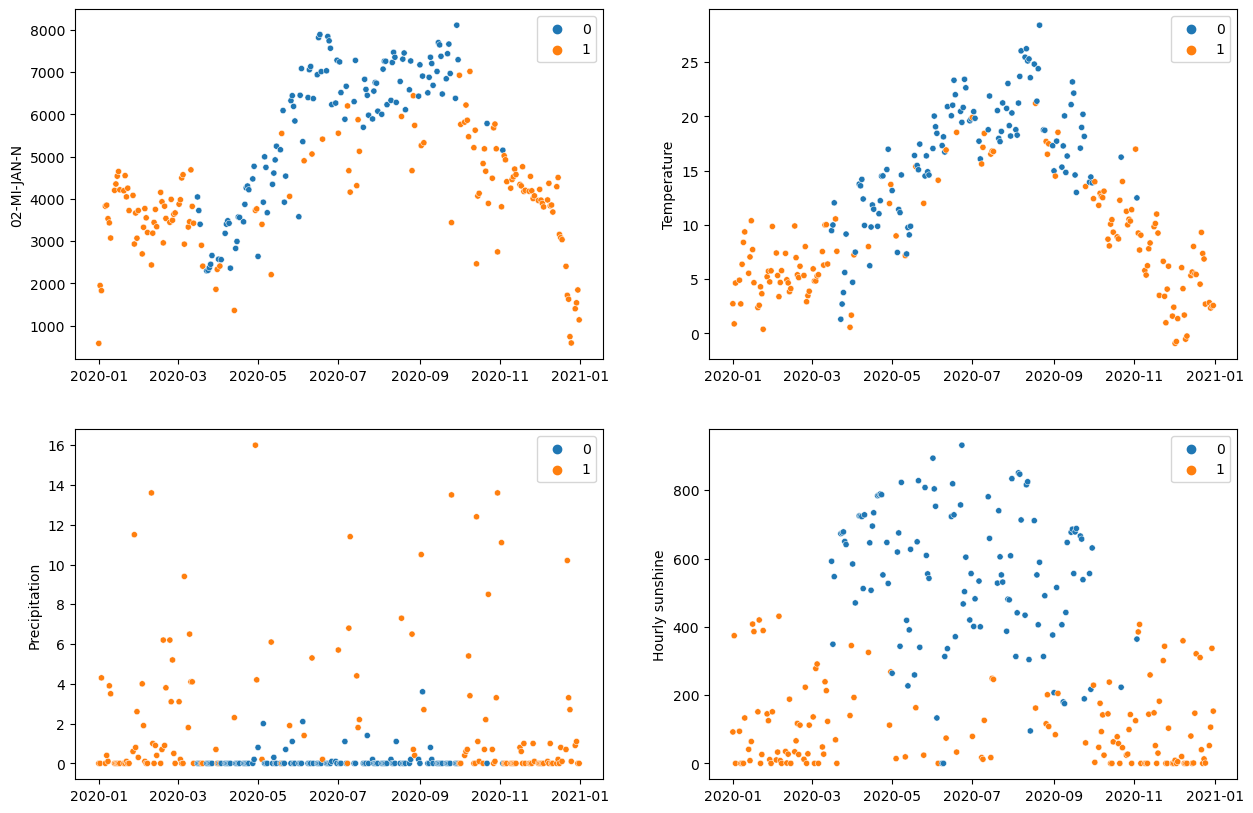

In [78]:
kmNormed = KMeans(n_clusters = numClusters)
kmNormed.fit(dfNormed)

labelNormed = pd.Categorical(kmNormed.labels_)

plotPredictions(weatherWeekdays,labelNormed,weatherLabels)


Next I will try to do hierarchical clusterin on the data

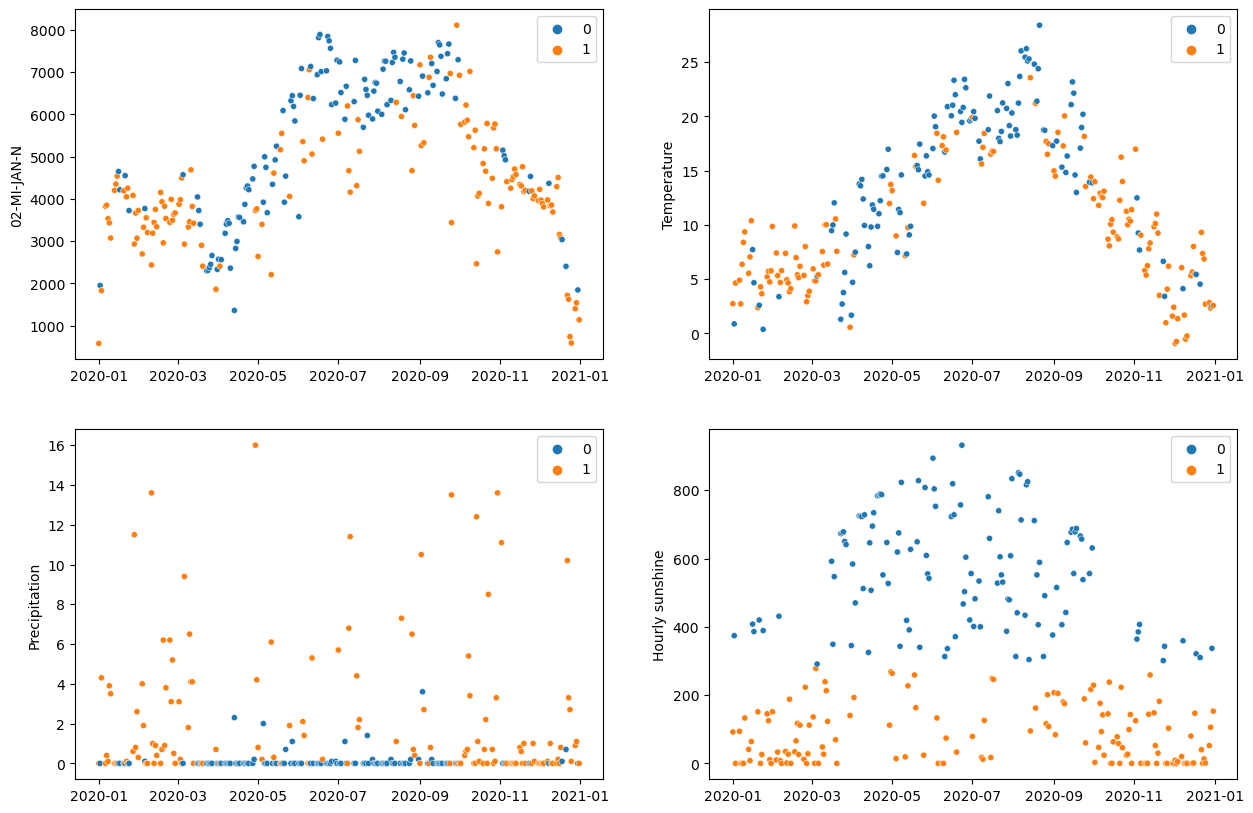

In [80]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters = numClusters,linkage = "ward").fit(train)
labelAgg = pd.Categorical(clustering.labels_)

plotPredictions(weatherWeekdays,labelAgg,weatherLabels)

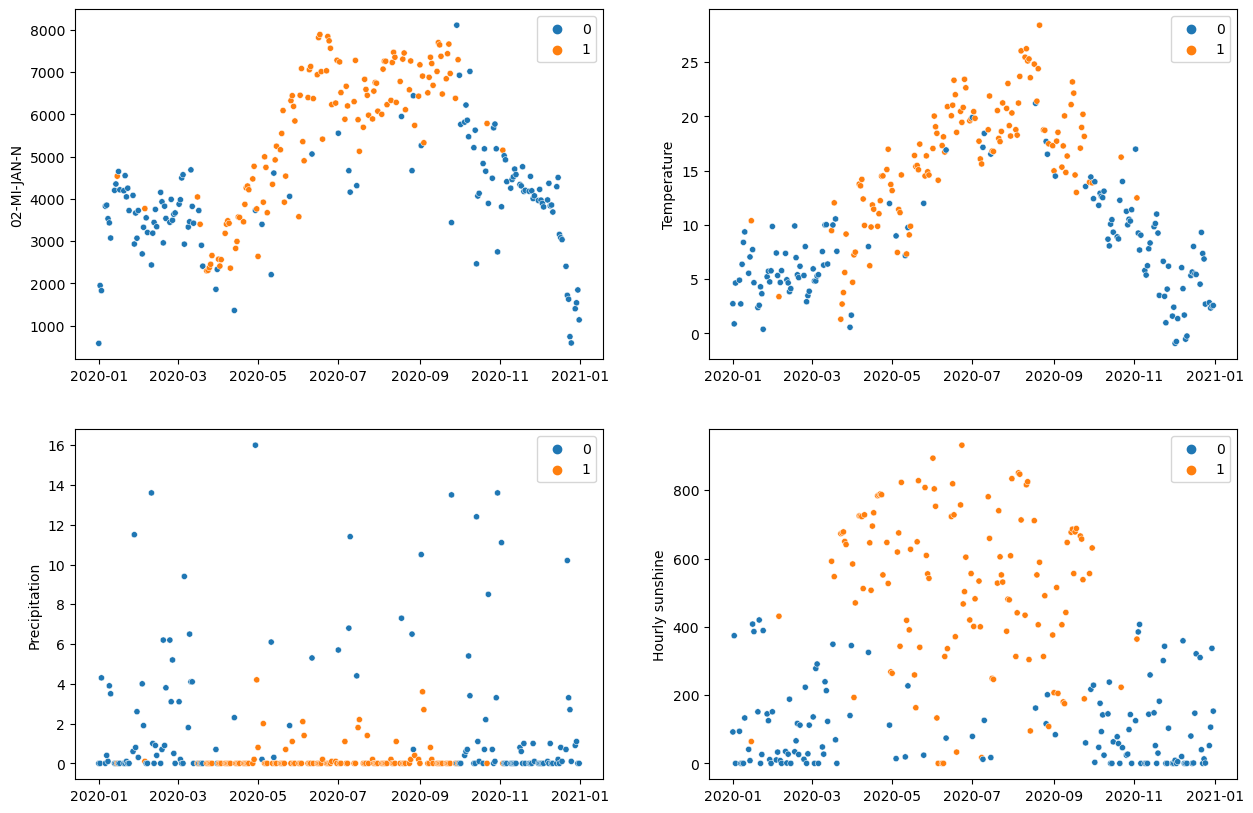

In [81]:
clustering = AgglomerativeClustering(n_clusters = numClusters).fit(dfNormed)
labelAggNormed = pd.Categorical(clustering.labels_)

plotPredictions(weatherWeekdays,labelAggNormed,weatherLabels)


As one last thing, I would like to compare the classes based on the measurment point. There must be a difference, since one leads to the airport, and one is in the city centre.

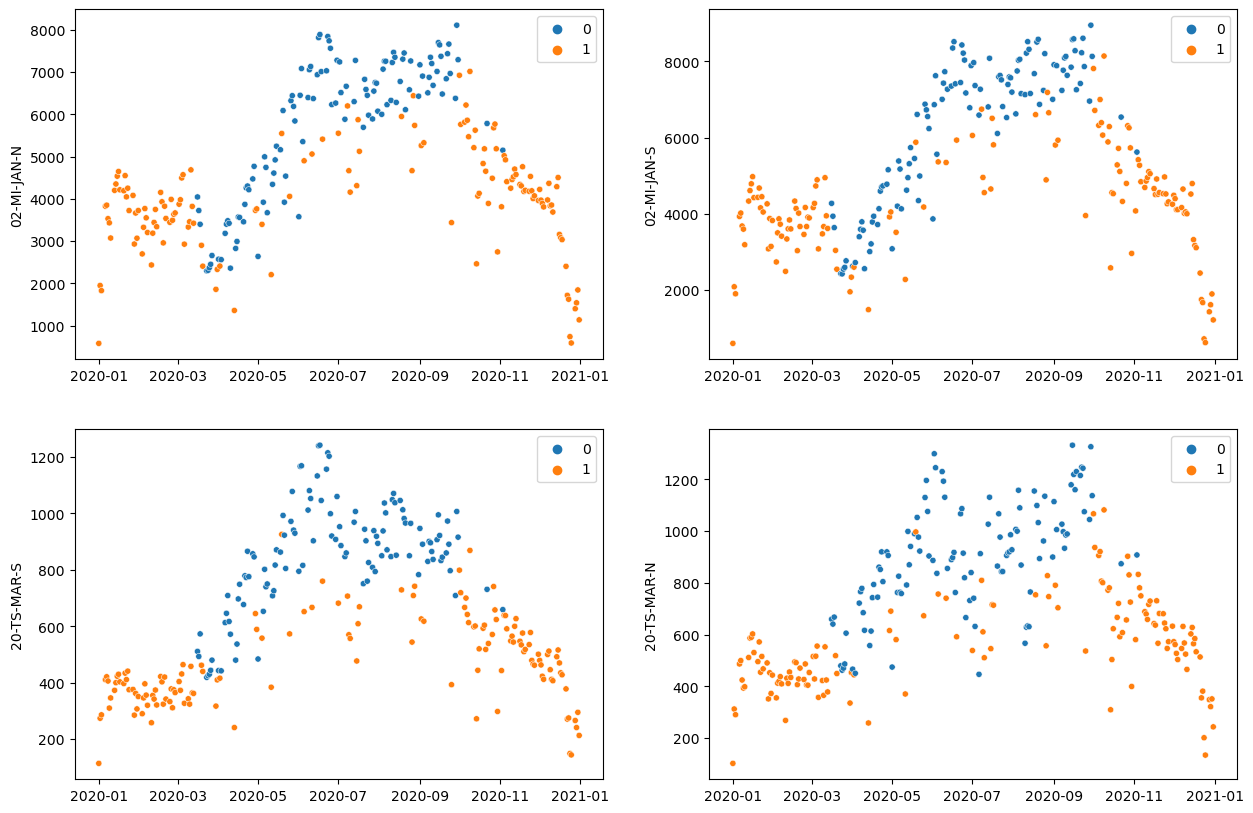

In [82]:
cols = ["02-MI-JAN-N","02-MI-JAN-S","20-TS-MAR-S","20-TS-MAR-N"]
plotPredictions(weatherWeekdays,labelNormed,cols)

In [83]:
#The average counts based on the classes in the time period of group 1
weekdays["Labels"] = labelAggNormed

#Find first and last occurence of 
group1 = weekdays[weekdays["Labels"]==1]
first = group1.index[1]
last = group1.index[-1]

labelReduced = weekdays[(weekdays.index < last) & (weekdays.index > first)]

labelGroups = labelReduced.groupby("Labels").mean()
labelGroups.loc[1]/labelGroups.loc[0]

C:\Users\hgand\AppData\Local\Temp\ipykernel_16524\3384914527.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labelGroups = labelReduced.groupby("Labels").mean()


02-MI-JAN-N    1.350772
02-MI-JAN-S    1.377085
03-MI-SAN-O    1.353191
03-MI-SAN-W    1.425110
06-FK-FRA-O    1.535122
06-FK-FRA-W    1.543337
10-PA-BER-N    1.500455
10-PA-BER-S    1.448762
12-PA-SCH      1.505804
13-CW-PRI      1.451639
15-SP-KLO-N    1.776305
15-SP-KLO-S    1.659040
17-SZ-BRE-O    1.781248
17-SZ-BRE-W    1.777268
18-TS-YOR-O    1.792418
18-TS-YOR-W    1.508359
19-TS-MON      1.429246
20-TS-MAR-N    1.502345
20-TS-MAR-S    1.695967
21-NK-MAY      1.382619
23-TK-KAI      1.380729
24-MH-ALB      1.713557
26-LI-PUP      1.699739
27-RE-MAR      1.516088
dtype: float64

One general observation is that there are more blue classes towards colder months, and the orange class on average has about 1.6 times higher cyclist counts than the blue. So one cluster is above the other cluster, and one clearly contains the days with higher cyclist counts, and the other days with lower counts.
  
Based on the normed agglomerative clustering, I decided to divide the data into 2 classes, one represents the days when people would hop on a bike, and the others when they wouldn't because of the weather and the day of the week. Or in another context, good enough weather, and bad weather.  
  
Next I want to test it on the weekends set, and classify them.

In [87]:
#Norm the data, then do the fitting
test = weatherWeekends[weatherWeekends.columns[4:]]

a = test[test.columns[:5]]
a = (a-a.mean())/a.std()
b = test[test.columns[5:]]
testNormed = pd.concat([a,b],axis = 1)
labels = kmNormed.predict(testNormed)

plotPredictions(weatherWeekends,labels,cols)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 12-PA-SCH
Feature names seen at fit time, yet now missing:
- Hourly sunshine
- Humidity
- Precipitation
- Temperature
- Wind_speed


With a quick look it seems all right, more people tend to go biking during warmer months. Also there is an outlier at one of the measure stations. However let's see other methods for training and prediciting.

In [85]:
weekends[weekends["02-MI-JAN-N"]>6000]

,02-MI-JAN-N,02-MI-JAN-S,03-MI-SAN-O,03-MI-SAN-W,06-FK-FRA-O,06-FK-FRA-W,10-PA-BER-N,10-PA-BER-S,12-PA-SCH,13-CW-PRI,...,18-TS-YOR-O,18-TS-YOR-W,19-TS-MON,20-TS-MAR-N,20-TS-MAR-S,21-NK-MAY,23-TK-KAI,24-MH-ALB,26-LI-PUP,27-RE-MAR
2020-06-06,7829.0,7597.0,2073.0,2566.0,2865.0,2471.0,3455.0,2887.0,2571.0,1502.0,...,3600.0,3828.0,4547.0,655.0,607.0,6752.0,1156.0,563.0,3178.0,1327.0


5. Now that I decided the classes, I make a decision tree whether to go biking or not given the current weather.

In [86]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(weatherWeekdays,labelNormed)

#Predict the weekends
labels = dtc.predict(weatherWeekends)
plotPredictions(weekends,labels,cols)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 06-FK-FRA-O
- 06-FK-FRA-W
- 10-PA-BER-N
- 10-PA-BER-S
- 12-PA-SCH
Feature names seen at fit time, yet now missing:
- 02-MI-JAN-N
- 02-MI-JAN-S
- 20-TS-MAR-N
- 20-TS-MAR-S
- Hourly sunshine
- ...


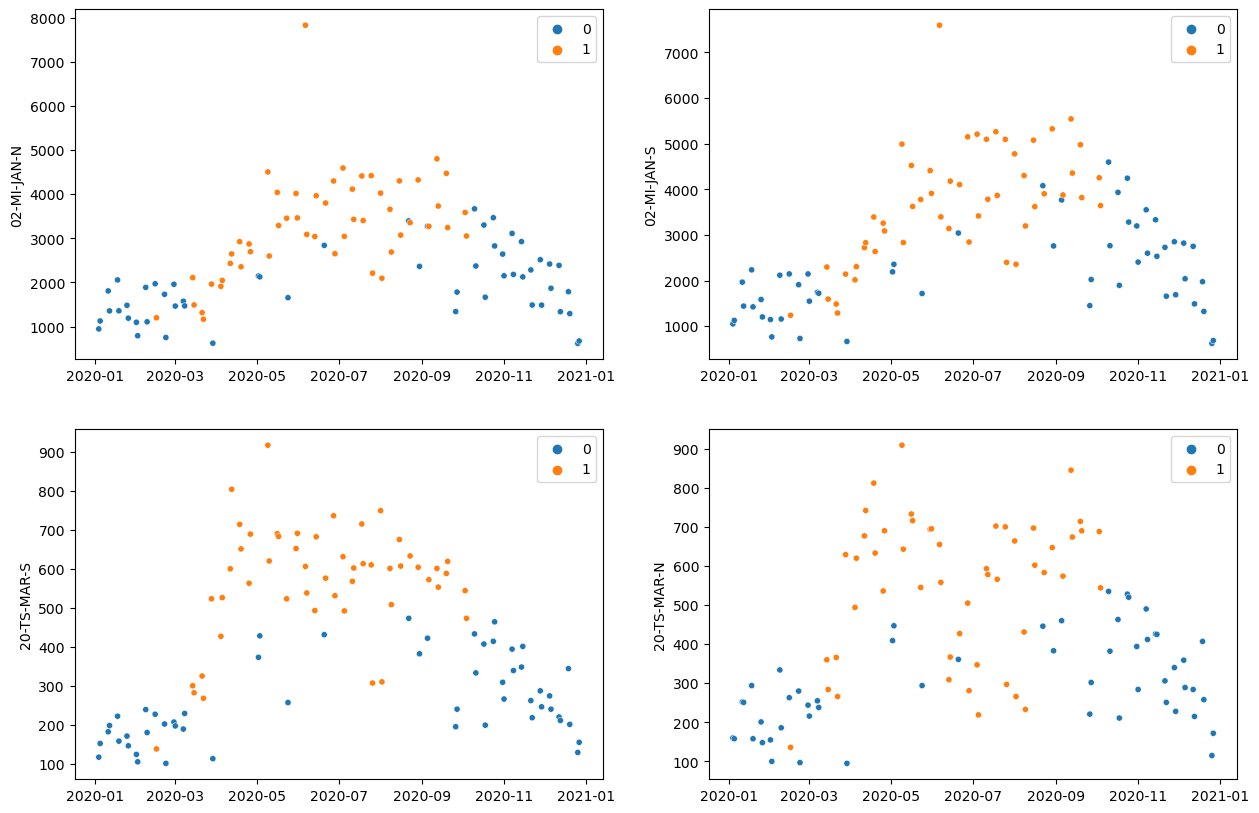

In [ ]:
#The decision tree does not seem the most accurate, as some features are being decided more times. So I will try random trees
#next as an ensamble method.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(weatherWeekdays,labelAggNormed)
#Predict the weekends, and plot the results
labels = rfc.predict(weatherWeekends)

plotPredictions(weekends,labels,cols)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

# Correspondences between cycling and weather (and later other) attributes
Correlation with weather, and if possible geograpgical, and traffic data


0. Try to find the attribute that effects going by bycicle the most

1. Do a linear regression based on the number of cyclsts, and the best attribute